# Introducción

A lo largo de este proyecto, utilizaremos el dataset entregado por el profesor para realizar nuestro análisis de los datos de algunas de las redes sociales más famosas, con el objetivo de sacar conclusiones para mejorar nuestra **RED SOCIAL**.

# 1. Importación de librerías y carga del dataset

En primer lugar, importaremos las librerías que emplearemos en el proyecto, además de cargar el ya comentado dataset.

In [3229]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset de las redes sociales
redSocialOriginal = pd.read_csv('Social Media Engagement Dataset.csv')

print(f"Dataset cargado: {redSocialOriginal.shape}")

Dataset cargado: (12000, 28)


# 2. Primer vistazo al dataset

En segundo lugar, mostraremos el dataset por encima para ver que nos encontramos.

In [3230]:
# Mostramos las primeras filas
redSocialOriginal.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [3231]:
# Mostramos el nombre de las columnas
redSocialOriginal.columns

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [3232]:
# Mostramos información del conjunto de datos
redSocialOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [3233]:
# Mostramos la descripción de los datos
redSocialOriginal.describe()

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.000553,0.503868,2490.72025,1007.167167,504.34575,49811.338500,0.278137,0.001472,0.000998,0.729692
std,0.583563,0.288198,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.576627,0.289940,57.787219
min,-0.999800,0.000000,0.00000,0.000000,0.00000,130.000000,0.001880,-0.999600,-0.499900,-99.900000
25%,-0.503200,0.251400,1236.00000,510.000000,253.00000,24716.500000,0.049100,-0.495975,-0.248400,-48.700000
50%,-0.006200,0.505950,2496.00000,1018.000000,503.00000,49674.000000,0.080605,0.001950,0.002800,0.900000
75%,0.513525,0.756200,3723.25000,1501.000000,755.00000,74815.000000,0.163123,0.501725,0.250700,50.100000
max,0.999900,0.999900,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,0.999400,0.499900,99.900000


# 3. Preprocesamiento

Seguidamente, vamos a realizarle un par de modificaciones previas al dataset para obtener mejores resultados en el futuro.

#### 3.1 Copia

In [3234]:
# Creamos una copia para evitar dañar el dataset original
redSocial = redSocialOriginal.copy()

#### 3.2 Columnas innecesarias

In [3235]:
# Eliminamos columnas innecesarias

redSocial = redSocial.drop(columns=["post_id"])
# Es el id técnico, el cual no es necesario pues ya tenemos el propio id generado por Python

redSocial = redSocial.drop(columns=["user_id"])
# Como no vamos a hacer análisis a nivel usuario, sino a nivel general, tampoco necesitamos este id, nos interesa el crecimiento de la web y no el de los usuarios

redSocial = redSocial.drop(columns=["user_past_sentiment_avg"])
redSocial = redSocial.drop(columns=["user_engagement_growth"])
# Como hemos dicho antes, no vamos realizar análisis a nivel usuario

redSocial = redSocial.drop(columns=["buzz_change_rate"])
# También consideramos prescindible el uso de esta columna, pues al final el impacto viral no son más que modas que van y vienen, 
# lo que ahora es popular en un mes puede no serlo, y como somos una empresa pequeña consideramos que en el inicio del lanzamiento es mejor tirar a lo seguro

redSocial = redSocial.drop(columns=["sentiment_score"])
redSocial = redSocial.drop(columns=["sentiment_label"])
# Consideramos redundante su uso, pues con la columna de toxicidad podemos hacernos a la idea de si el post es positivo o negativo


#### 3.3 Renombrar columnas

In [3236]:
# Renombramos todas las columnas en español
redSocial = redSocial.rename(columns={
    "likes_count": "likes",
    "text_content": "contenido_texto",
    "platform": "plataforma",
    "timestamp": "fecha",
    "day_of_week": "dia_semana",
    "mentions": "menciones",
    "keywords": "palabras_clave", #Eliminar
    "impressions": "visualizaciones",
    "engagement_rate": "tasa_compromiso",
    "toxicity_score": "toxicidad",
    "brand_name": "nombre_marca",
    "product_name": "nombre_producto",
    "campaign_name": "nombre_campania",
    "campaign_phase": "fase_campania", #Eliminar
    "location": "ubicacion",
    "comments_count": "comentarios",
    "language": "idioma",
    "shares_count": "compartidos",
    "emotion_type": "emocion",
    "topic_category": "categoria_tema",
})

#### 3.4 Creación de nuevas columnas

In [3237]:
# Primero, convertimos la columna de fecha a tipo datetime
redSocial["fecha"] = pd.to_datetime(redSocial["fecha"])

# Ahora, cogemos sus componentes para convertirlos en nuevas columnas, que nos servirán para análisis temporales más concretos
redSocial["anio"] = redSocial["fecha"].dt.year
redSocial["mes"] = redSocial["fecha"].dt.month
redSocial["dia"] = redSocial["fecha"].dt.day
redSocial["hora"] = redSocial["fecha"].dt.hour
redSocial["nombre_mes"] = redSocial["fecha"].dt.month_name()

# Definimos las franjas horarias
# Madrugada: 0-5, Mañana: 6-11, Tarde: 12-17, Noche: 18-23
bins = [0, 5, 11, 17, 23]
labels = ["Madrugada", "Mañana", "Tarde", "Noche"]

# Creamos la columna con las franjas horarias
redSocial["franja_horaria"] = pd.cut(redSocial["hora"], bins=bins, labels=labels, include_lowest=True, right=True)

In [3238]:
# La siguiente columna nos servirá para comparaciones más sencillas con las visualizaciones en las publicaciones
redSocial["interacciones_totales"] = (
    redSocial["likes"] +
    redSocial["compartidos"] +
    redSocial["comentarios"]
)

In [3239]:
# Esta columna será para juntar todas las ciudades de un mismo país
redSocial["pais"] = redSocial["ubicacion"].str.split(",").str[-1].str.strip()

# Ahora vamos a ordenar todos los países por sus respectivos continentes
# Para ello mapearemos los países con su continente
paises_a_continentes = {
    "Spain": "Europe",
    "France": "Europe",
    "UK": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "USA": "North America",
    "Mexico": "North America",
    "Canada": "North America",
    "Brazil": "South America",
    "Australia": "Oceania",
    "China": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "India": "Asia",
    "Singapore": "Asia",
    "UAE": "Asia",
    "Egypt": "Africa",
    "South Africa": "Africa",
    "Nigeria": "Africa"
}

# Ahora creamos la columna con el mapeo previo
redSocial["continente"] = redSocial["pais"].map(paises_a_continentes)

# 4. Limpieza de datos

Antes de realizar cualquier ejercicio, deberemos asegurarnos de que los datos están listos para ser manejados, con el fin de evitar errores. Para ello, procederemos con una limpieza completa de los datos que consideremos corruptos.

#### 4.1 Valores nulos

Primero, comprobaremos si existen valores nulos en el dataset.

In [3240]:
redSocial.isna().sum()

fecha                       0
dia_semana                  0
plataforma                  0
ubicacion                   0
idioma                      0
contenido_texto             0
hashtags                    0
menciones                3941
palabras_clave              0
categoria_tema              0
emocion                     0
toxicidad                   0
likes                       0
compartidos                 0
comentarios                 0
visualizaciones             0
tasa_compromiso             0
nombre_marca                0
nombre_producto             0
nombre_campania             0
fase_campania               0
anio                        0
mes                         0
dia                         0
hora                        0
nombre_mes                  0
franja_horaria              0
interacciones_totales       0
pais                        0
continente                  0
dtype: int64

Como hemos podido comprobar, únicamente hay valores nulos en la columna *menciones*.
Como esta columna no influye en las métricas principales, hemos decidido reemplazar los valores nulos por una cadena vacía para no perder registros y mantener los datos completos.

In [3241]:
redSocial["menciones"] = redSocial["menciones"].fillna("")
redSocial.isna().sum()

fecha                    0
dia_semana               0
plataforma               0
ubicacion                0
idioma                   0
contenido_texto          0
hashtags                 0
menciones                0
palabras_clave           0
categoria_tema           0
emocion                  0
toxicidad                0
likes                    0
compartidos              0
comentarios              0
visualizaciones          0
tasa_compromiso          0
nombre_marca             0
nombre_producto          0
nombre_campania          0
fase_campania            0
anio                     0
mes                      0
dia                      0
hora                     0
nombre_mes               0
franja_horaria           0
interacciones_totales    0
pais                     0
continente               0
dtype: int64

#### 4.2 Valores duplicados

También comprobaremos si es que existe algún valor duplicado.

In [3242]:
redSocial.duplicated().sum()

np.int64(0)

En este caso, no hemos detectado registros duplicados en dataset, por lo que no necesitamos aplicar ningún tratamiento adicional.

# 5. Análisis

A continuación, comenzaremos con el análisis y las comparativas de los datos utilizando matplotlib, que es una biblioteca de Python de código abierto para crear visualizaciones de datos como líneas, barras, dispersión, histogramas y más.

### 5.1 Interacciones Totales vs Visualizaciones 

En esta sección, emplearemos la columna *interacciones totales*, que creamos anteriormente, para analizar todas las interacciones (likes, comentarios y compartidos) de las diferentes plataformas.

##### Evolución de publicaciones por mes

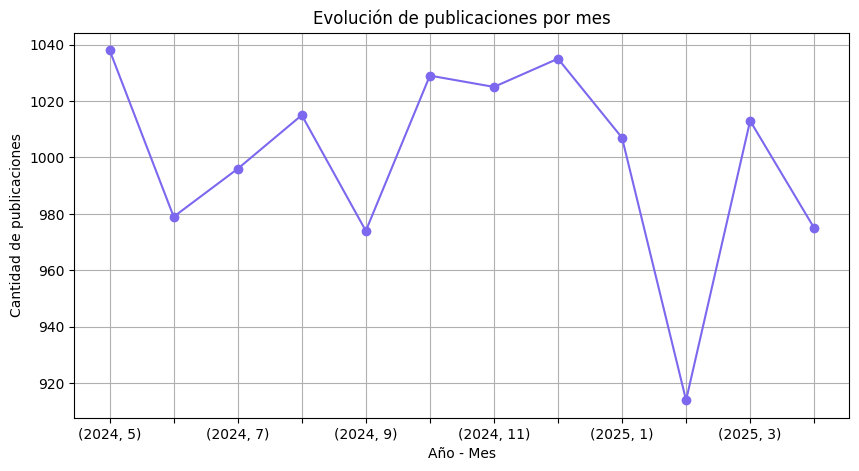

In [3243]:
# 1. Tu agrupación original
publicaciones_por_mes = redSocial.groupby(["anio", "mes"]).size()

plt.figure(figsize=(10, 5))

publicaciones_por_mes.plot(kind="line", marker="o", color="mediumslateblue")

plt.xticks(
    ticks=range(len(publicaciones_por_mes)), # Una marca por cada dato
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de publicaciones")
plt.title("Evolución de publicaciones por mes")
plt.grid(True) # Cuadrícula para ayudar a leer
plt.show()

##### Evolución de visualizaciones por mes

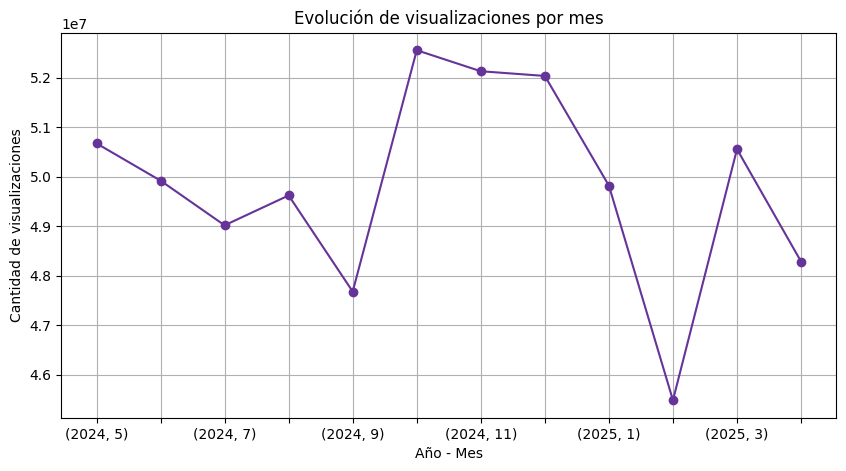

In [3244]:
# Agrupar por año y mes sumando las visualizaciones
visualizaciones_por_mes = (
    redSocial.groupby(["anio", "mes"])["visualizaciones"]
    .sum()
)

plt.figure(figsize=(10, 5))

visualizaciones_por_mes.plot(kind="line", marker="o", color="rebeccapurple")

plt.xticks(
    ticks=range(len(publicaciones_por_mes)), # Una marca por cada dato
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de visualizaciones")
plt.title("Evolución de visualizaciones por mes")
plt.grid(True)  # Cuadrícula para ayudar a leer
plt.show()


##### Evolución de interacciones totales por mes

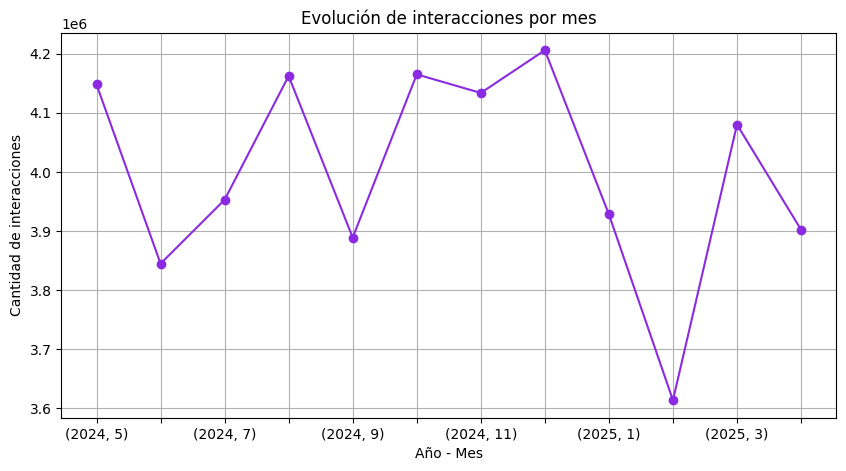

In [3245]:
# Agrupar por año y mes sumando las visualizaciones
visualizaciones_por_mes = (
    redSocial.groupby(["anio", "mes"])["interacciones_totales"]
    .sum()
)

plt.figure(figsize=(10, 5))

visualizaciones_por_mes.plot(kind="line", marker="o", color="blueviolet")

plt.xticks(
    ticks=range(len(publicaciones_por_mes)), # Una marca por cada dato
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de interacciones")
plt.title("Evolución de interacciones por mes")
plt.grid(True)  # Cuadrícula para ayudar a leer
plt.show()


##### Distribución de interacciones totales por plataforma

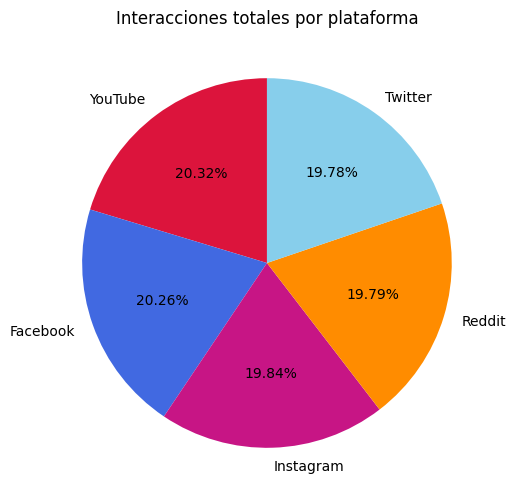

In [3246]:
# Agrupamos por plataforma
interacciones_plataforma = (
    redSocial.groupby("plataforma")["interacciones_totales"]
    .sum()
    .sort_values(ascending=False)
)

# Diagrama de sectores
colores = [
    "crimson", #YouTube
    "royalblue", #Facebook
    "mediumvioletred", #Instagram
    "darkorange", #Reddit
    "skyblue" #Twitter
]

plt.figure(figsize=(6,6))
plt.pie(
    interacciones_plataforma.values,
    labels=interacciones_plataforma.index,
    autopct='%1.2f%%', #Para que aparezca el porcentaje de cada plataforma
    startangle=90, #Para centrar el gráfico para que se vea mejor
    colors=colores
)
plt.title("Interacciones totales por plataforma")
plt.show()

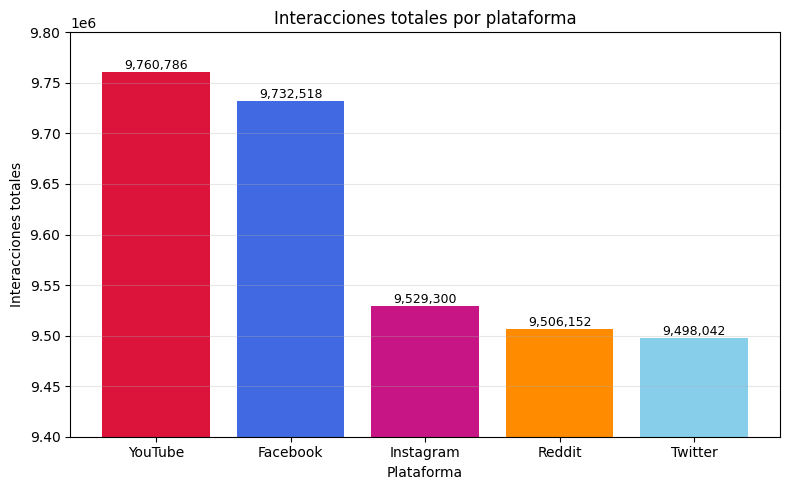

In [3247]:
# Agrupamos por plataforma
interacciones_plataforma = (
    redSocial.groupby("plataforma")["interacciones_totales"]
    .sum()
    .sort_values(ascending=False)
)

# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(
    interacciones_plataforma.index,
    interacciones_plataforma.values,
    color=["crimson", "royalblue", "mediumvioletred", "darkorange", "skyblue"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Interacciones totales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Interacciones totales")
plt.ylim(9400000,9800000)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


##### Distribución de visualizaciones por plataforma

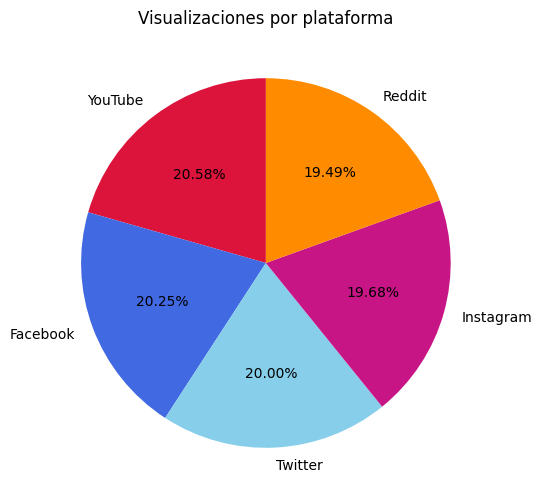

In [3248]:
# Agrupamos por plataforma
visualizaciones_plataforma = (
    redSocial.groupby("plataforma")["visualizaciones"]
    .sum()
    .sort_values(ascending=False)
)

# Diagrama de sectores
colores = [
    "crimson",
    "royalblue",
    "skyblue", 
    "mediumvioletred", 
    "darkorange" 
]

plt.figure(figsize=(6,6))
plt.pie(
    visualizaciones_plataforma.values,
    labels=visualizaciones_plataforma.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=colores
)
plt.title("Visualizaciones por plataforma")
plt.show()

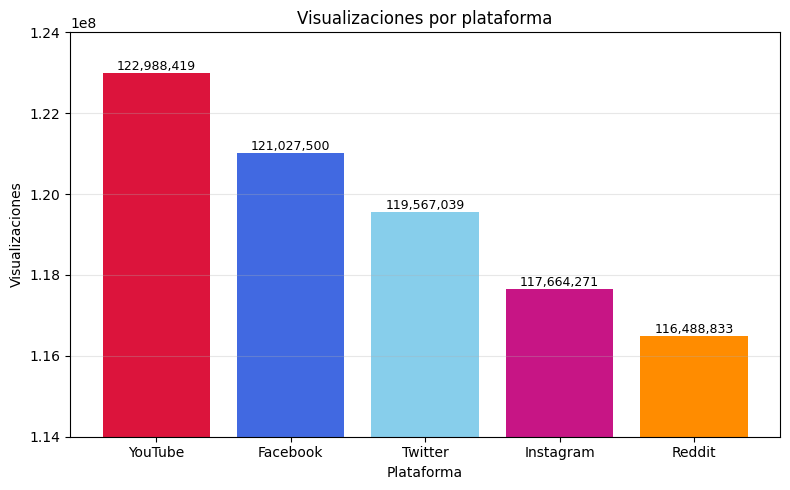

In [3249]:
# Agrupamos por plataforma
visualizaciones_plataforma = (
    redSocial.groupby("plataforma")["visualizaciones"]
    .sum()
    .sort_values(ascending=False)
)

# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(
    visualizaciones_plataforma.index,
    visualizaciones_plataforma.values,
    color=["crimson", "royalblue", "skyblue", "mediumvioletred", "darkorange"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Visualizaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Visualizaciones")
plt.ylim(114000000,124000000)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


##### Tasa de compromiso por plataforma

La tasa de compromiso (engagement rate en inglés), es una comparativa entre las visualizaciones y las interacciones totales de un post. Se calcula dividiendo las interacciones totales entre las visualizaciones/impresiones y multiplicándolo por 100 para sacar su porcentaje.  

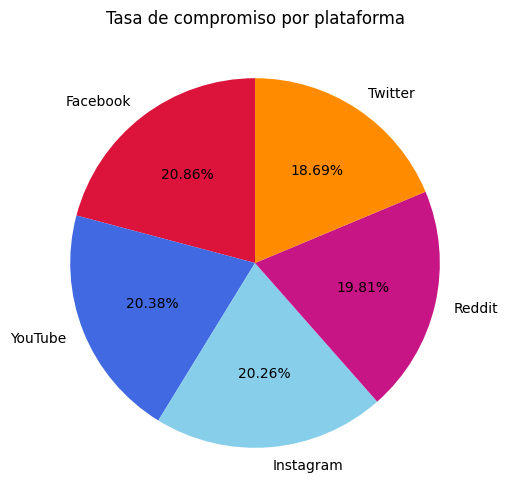

In [3250]:
# Agrupamos por plataforma
visualizaciones_plataforma = (
    redSocial.groupby("plataforma")["tasa_compromiso"]
    .sum()
    .sort_values(ascending=False)
)

# Diagrama de sectores
colores = [
    "crimson",
    "royalblue",
    "skyblue", 
    "mediumvioletred", 
    "darkorange" 
]

plt.figure(figsize=(6,6))
plt.pie(
    visualizaciones_plataforma.values,
    labels=visualizaciones_plataforma.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=colores
)
plt.title("Tasa de compromiso por plataforma")
plt.show()

##### Países ordenados por interacciones totales

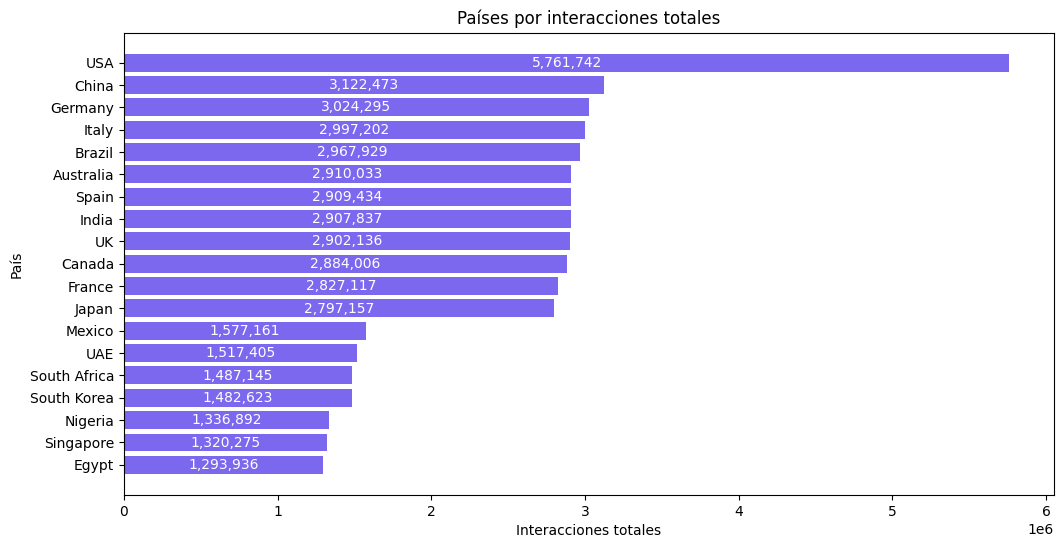

In [3251]:
interacciones_pais = (
    redSocial.groupby("pais")["interacciones_totales"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(interacciones_pais.index, interacciones_pais.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Países por interacciones totales")
plt.xlabel("Interacciones totales")
plt.ylabel("País")
plt.show()

##### Países ordenados por visualizaciones

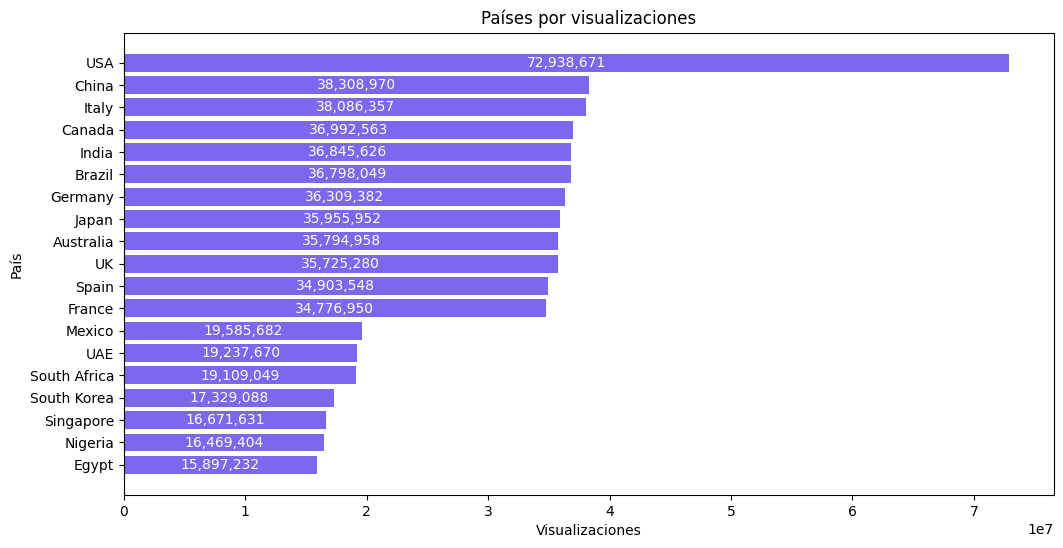

In [3252]:
visualizaciones_pais = (
    redSocial.groupby("pais")["visualizaciones"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(visualizaciones_pais.index, visualizaciones_pais.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Países por visualizaciones")
plt.xlabel("Visualizaciones")
plt.ylabel("País")
plt.show()

##### Interacciones totales vs visualizaciones por hora del día

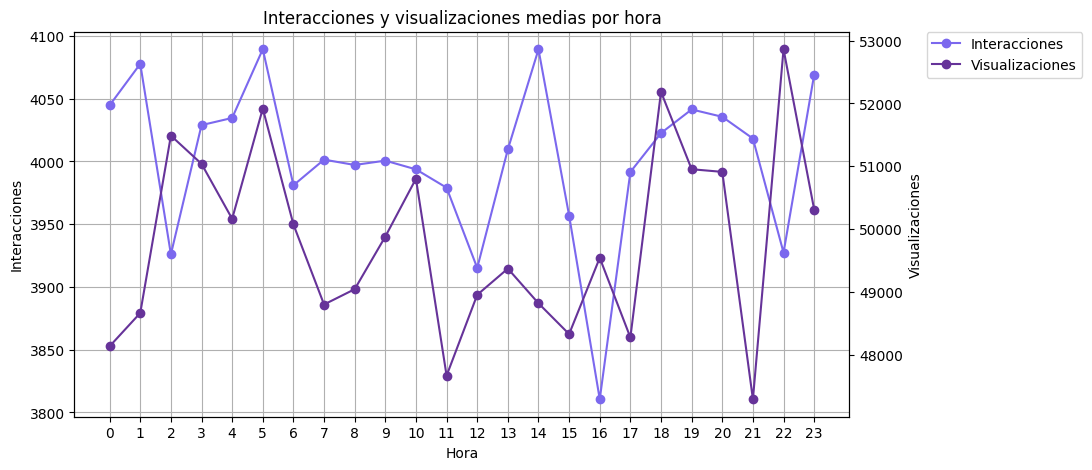

In [3253]:
# Agrupamos por hora calculando la media
metricas_hora = (
    redSocial
    .groupby("hora")[["interacciones_totales", "visualizaciones"]]
    .mean()
)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Interacciones (eje izquierdo)
linea1 = ax1.plot(
    metricas_hora.index,
    metricas_hora["interacciones_totales"],
    marker='o',
    color="mediumslateblue",
    label="Interacciones"
)
ax1.set_xlabel("Hora")
ax1.set_ylabel("Interacciones")
ax1.set_xticks(range(24))
ax1.grid(True)

# Visualizaciones (eje derecho)
ax2 = ax1.twinx() # Usamos twinx para mostrar dos variables con diferentes escalas en el mismo gráfico
linea2 = ax2.plot(
    metricas_hora.index,
    metricas_hora["visualizaciones"],
    marker='o',
    color="rebeccapurple",
    label="Visualizaciones"
)
ax2.set_ylabel("Visualizaciones")

# Leyenda conjunta
lineas = linea1 + linea2
labels = [l.get_label() for l in lineas]
ax1.legend(lineas, labels, loc="center", bbox_to_anchor=(1.2, 0.94))

plt.title("Interacciones y visualizaciones medias por hora")
plt.show()

##### Interacciones totales vs visualizaciones por franja horaria

C:\Users\Asier\AppData\Local\Temp\ipykernel_20348\3669476503.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metricas_franja = redSocial.groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]].sum()


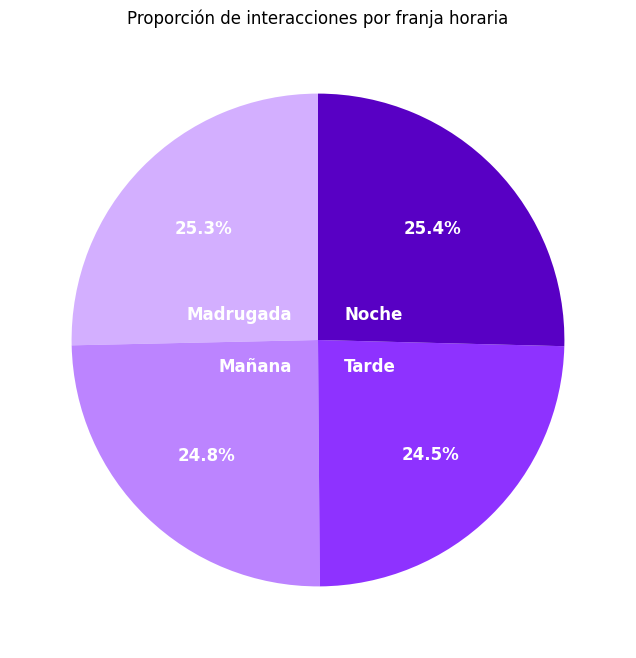

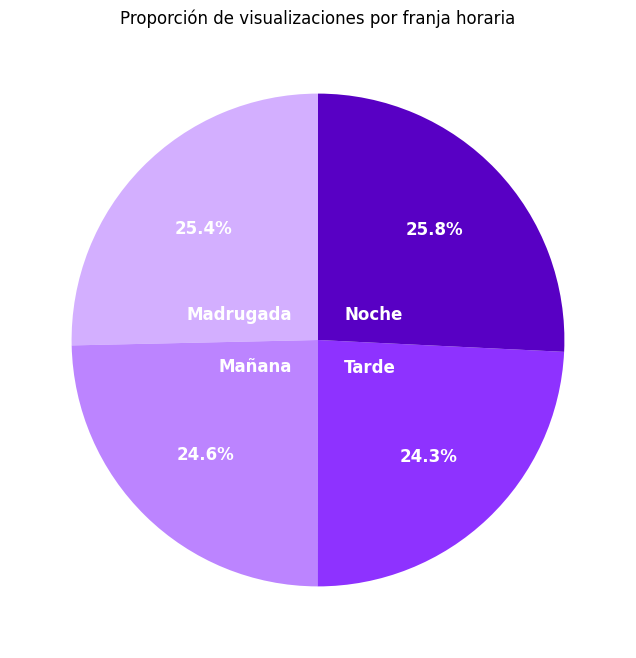

In [3254]:
# Agrupamos por franja y sumamos interacciones y visualizaciones
metricas_franja = redSocial.groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]].sum()

# Gráfico de pie para interacciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja["interacciones_totales"],
    labels=metricas_franja.index,
    autopct='%1.1f%%', # Para que aparezca el porcentaje
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90, # Para que esté centrado
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de interacciones por franja horaria")
plt.show()

# Gráfico de pie para visualizaciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja["visualizaciones"],
    labels=metricas_franja.index,
    autopct='%1.1f%%',
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90,
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de visualizaciones por franja horaria")
plt.show()

### 5.2 Toxicidad

#### Toxicidad media por continente


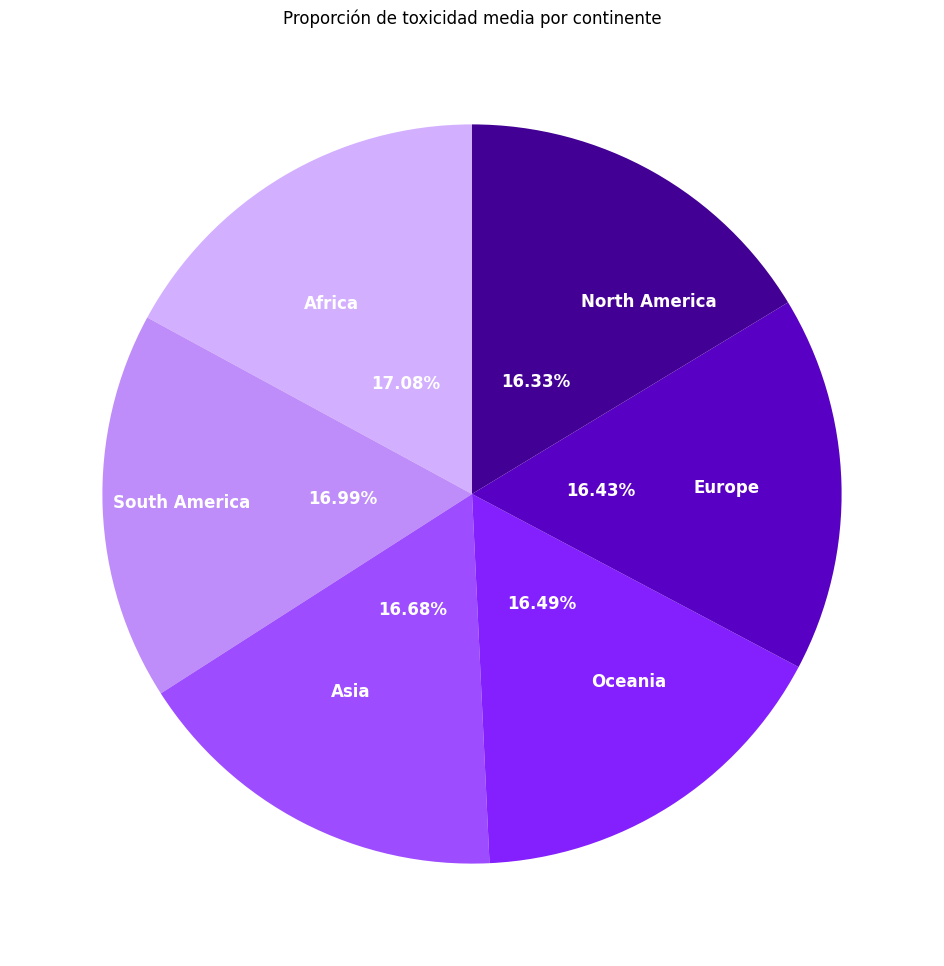

In [3255]:
# Toxicidad media por continente
toxicidad_continente = (
    redSocial
    .groupby("continente")["toxicidad"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,12))

plt.pie(
    toxicidad_continente.values,
    labels=toxicidad_continente.index,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance=0.35,   # Porcentajes fuera del pastel
    labeldistance=0.6,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BE8DF9", "#9D4CFF", "#8320FD", "#5800C4", "#430094"],
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)

plt.title("Proporción de toxicidad media por continente")
plt.show()


### 5.3 Análisis a nivel España

##### Plataformas con más publicaciones (España)

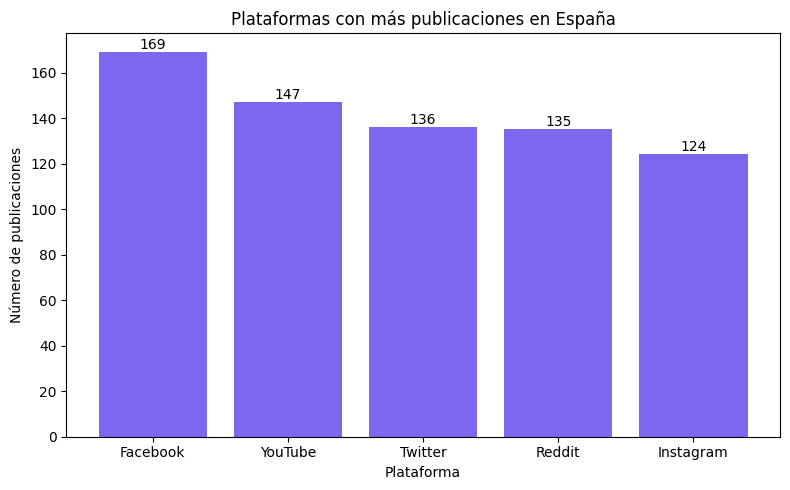

In [3256]:
# Contar publicaciones por plataforma en España
plataformas_es = (
    redSocial[redSocial["pais"] == "Spain"]["plataforma"]
    .value_counts()
)

plt.figure(figsize=(8, 5))

bars = plt.bar(
    plataformas_es.index,
    plataformas_es.values,
    color="mediumslateblue"
)

plt.xlabel("Plataforma")
plt.ylabel("Número de publicaciones")
plt.title("Plataformas con más publicaciones en España")

# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.0f}')

plt.tight_layout()
plt.show()

##### Plataformas con más visualizaciones (España)

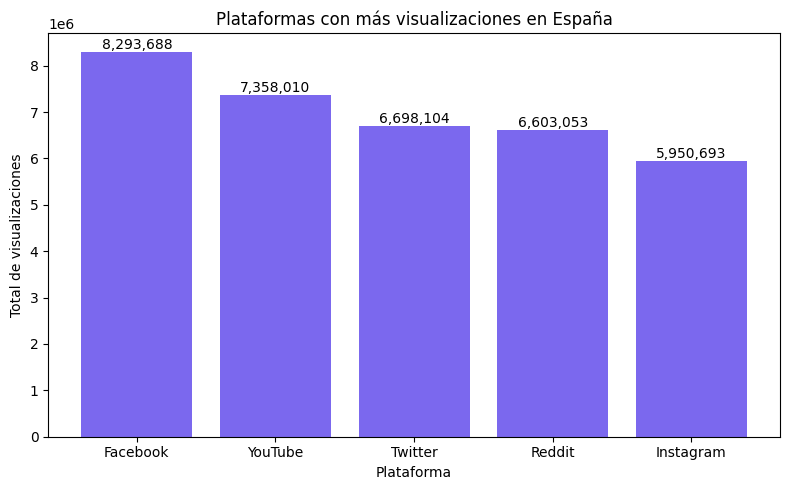

In [3257]:
# Sumar visualizaciones por plataforma en España
plataformas_visualizaciones_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("plataforma")["visualizaciones"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))

bars = plt.bar(
    plataformas_visualizaciones_es.index,
    plataformas_visualizaciones_es.values,
    color="mediumslateblue"
)

plt.xlabel("Plataforma")
plt.ylabel("Total de visualizaciones")
plt.title("Plataformas con más visualizaciones en España")

# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.0f}')

plt.tight_layout()
plt.show()

##### Interacciones totales vs visualizaciones por del día (España)

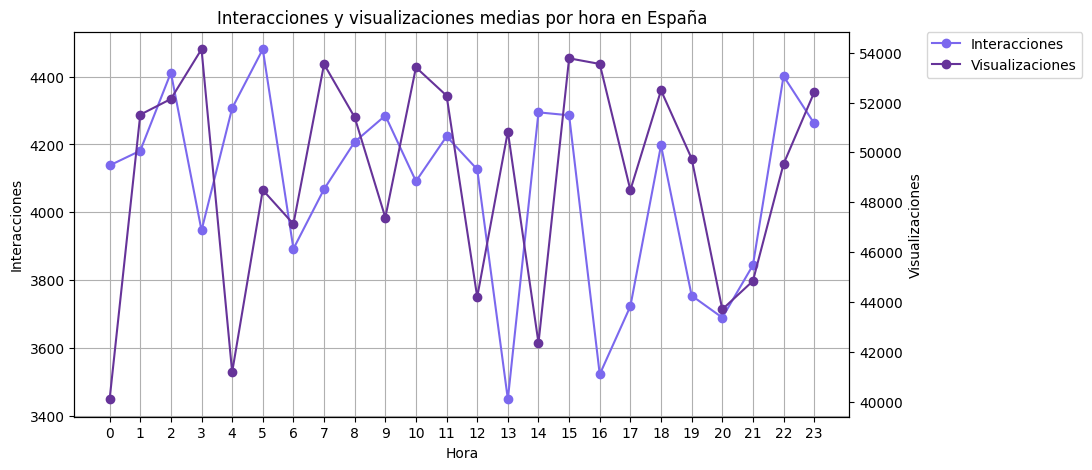

In [3258]:
# Agrupamos por hora calculando la media
metricas_hora = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("hora")[["interacciones_totales", "visualizaciones"]]
    .mean()
)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Interacciones (eje izquierdo)
linea1 = ax1.plot(
    metricas_hora.index,
    metricas_hora["interacciones_totales"],
    marker='o',
    color="mediumslateblue",
    label="Interacciones"
)
ax1.set_xlabel("Hora")
ax1.set_ylabel("Interacciones")
ax1.set_xticks(range(24))
ax1.grid(True)

# Visualizaciones (eje derecho)
ax2 = ax1.twinx()  # Dos escalas distintas en el mismo gráfico
linea2 = ax2.plot(
    metricas_hora.index,
    metricas_hora["visualizaciones"],
    marker='o',
    color="rebeccapurple",
    label="Visualizaciones"
)
ax2.set_ylabel("Visualizaciones")

# Leyenda conjunta
lineas = linea1 + linea2
labels = [l.get_label() for l in lineas]
ax1.legend(lineas, labels, loc="center", bbox_to_anchor=(1.2, 0.94))

plt.title("Interacciones y visualizaciones medias por hora en España")
plt.show()


##### Interacciones totales vs visualizaciones por franja horaria (España)

C:\Users\Asier\AppData\Local\Temp\ipykernel_20348\264928705.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]]


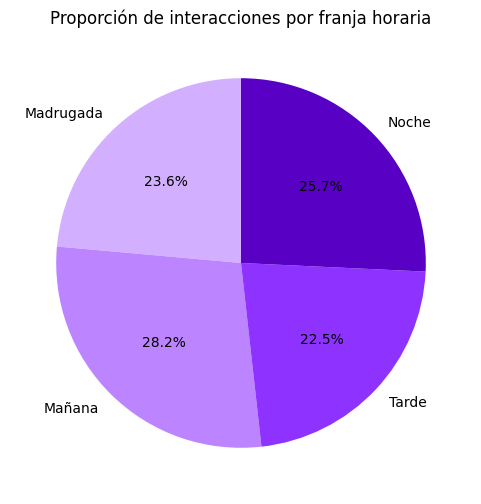

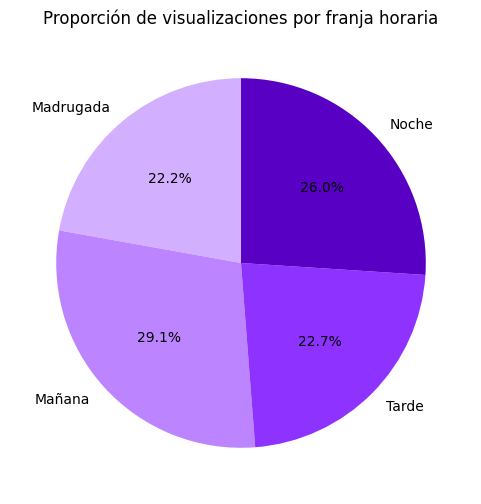

In [3259]:
# Agrupamos por franja y sumamos interacciones y visualizaciones
metricas_franja = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]]
    .sum()
)

# Interacciones
plt.figure(figsize=(6,6))
plt.pie(
    metricas_franja["interacciones_totales"],
    labels=metricas_franja.index,
    autopct='%1.1f%%', # Para que aparezca el porcentaje
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90 # Para que esté centrado
)
plt.title("Proporción de interacciones por franja horaria")
plt.show()

# Visualizaciones
plt.figure(figsize=(6,6))
plt.pie(
    metricas_franja["visualizaciones"],
    labels=metricas_franja.index,
    autopct='%1.1f%%',
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90
)
plt.title("Proporción de visualizaciones por franja horaria")
plt.show()

##### Marcas con mayor tasa de compromiso (España)

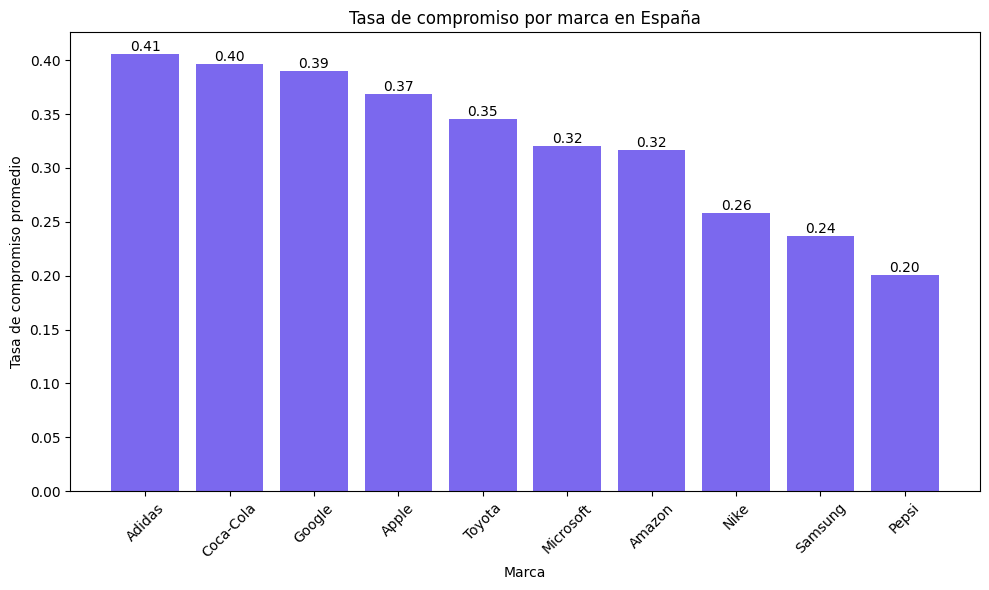

In [3260]:
marcas_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("nombre_marca")["tasa_compromiso"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))

bars = plt.bar(
    marcas_es.index,
    marcas_es.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por marca en España")
plt.xlabel("Marca")
plt.ylabel("Tasa de compromiso promedio")

plt.xticks(rotation=45)

# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

plt.tight_layout()
plt.show()

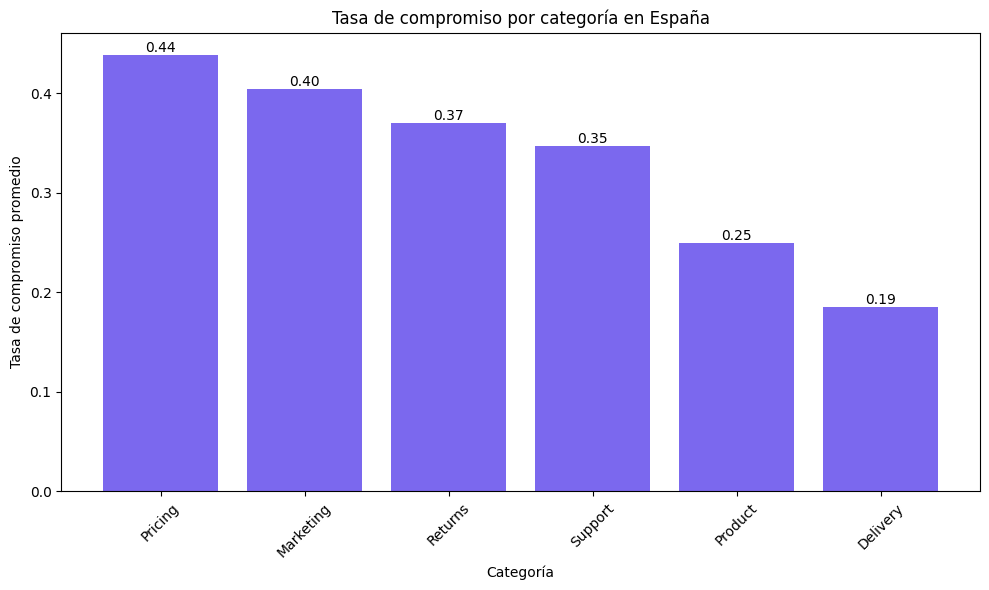

In [3261]:
marcas_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("categoria_tema")["tasa_compromiso"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))

bars = plt.bar(
    marcas_es.index,
    marcas_es.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por categoría en España")
plt.xlabel("Categoría")
plt.ylabel("Tasa de compromiso promedio")

plt.xticks(rotation=45)

# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

plt.tight_layout()
plt.show()